# Day 28

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

데이터 집단에서 샘플 추출

* Random Variable: 샘플의 숫자가 한개 나올 떄

* Stochasatic Process: Sample을 뽑았는데 set이 아닌 list로 나오는 것이다. 즉 상호 관계를 가지는 순서열이다. **순서가 정해져 있다 이게 중요**


# 시계열 자료와 확률 과정

## 확률 과정

**확률 과정(Stochastic process, Random process)**은 상호 상관 관계를 가지는 무한 개의 확률 변수의 순서열을 말한다. 확률 과정에 포함된 확률 변수는 시간 인덱스  $t$에 의해 정렬되어 있다.

 $$ Y = \{ \cdots, Y_{-2}, Y_{-1}, Y_0, Y_1, Y_2, \cdots \} $$
 
 얘네는 독립이 아니다.

**시계열 자료(time series data)**란 이러한 확률 과정의 샘플이다.

$$ y = \{ \cdots, y_{-2}, y_{-1}, y_0, y_1, y_2, \cdots \} $$

시계열 자료는 다음과 같이 표기하기도 한다.

$$ \{ y_t: t=\cdots, -2, -1, 0, 1, 2, \cdots \} $$

만약 시간 인덱스 $t$를 정수만 사용한다면 이산 시간 확률 과정(discrete time stochastic process)이라고 한다. 일반적인 시계열 분석에서는 이산 시간 확률 과정을 다루지만 금융 파생 상품의 가결 결정 이론 등에서는 시간 인덱스가 임의의 실수가 될 수 있는 연속 시간 확률 과정(continuous time stochastic process)도 다룬다.

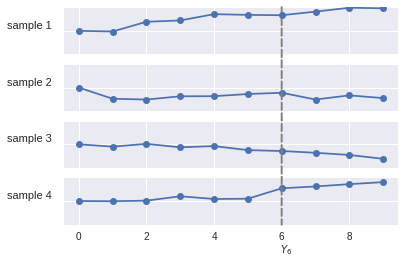

In [4]:
t = np.arange(10)
np.random.seed(99)
y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)
y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=9)), 0, 0)

ax1 = plt.subplot(4, 1, 1)
ax1.plot(t, y1, '-o')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(-5, 5)
ax1.set_zorder(2)
ax1.set_ylabel("sample 1").set_rotation(0)
ax1.yaxis.set_tick_params(pad=30)

ax2 = plt.subplot(4, 1, 2)
ax2.plot(t, y2, '-o')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(-5, 5)
ax2.set_zorder(1)
ax2.set_ylabel("sample 2").set_rotation(0)
ax2.yaxis.set_tick_params(pad=30)

ax3 = plt.subplot(4, 1, 3)
ax3.plot(t, y3, '-o')
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_ylim(-5, 5)
ax3.set_zorder(1)
ax3.set_ylabel("sample 3").set_rotation(0)
ax3.yaxis.set_tick_params(pad=30)

ax4 = plt.subplot(4, 1, 4)
ax4.plot(t, y4, '-o')
ax4.set_yticklabels([])
ax4.set_ylim(-5, 5)
ax4.set_zorder(1)
ax4.set_ylabel("sample 4").set_rotation(0)
ax4.yaxis.set_tick_params(pad=30)
ax4.annotate('$Y_6$', xy=(6 - 0.05, -11), xycoords='data', annotation_clip=False)

from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(6,5), xyB=(6,-5), ls="--", lw=2, color="gray", 
                      coordsA="data", coordsB="data", axesA=ax1, axesB=ax4)
ax1.add_artist(con);

예를 들어 특정 회사의 주가를 시계열 자료로 보고 이 시계열 자료가 확률 과정이라고 가정하면 우리가 보는 주가 경로 전체가 확률 과정에서 나올 수 있는 하나의 샘플일 뿐이다. 즉, 우리가 살고 있는 이 세계(지금 보고 있는 바로 그 주가 자료를 가지고 있는 세계) 자체가 확률 과정의 **하나의 샘플**이다.

이렇게 본다면 아직 실현되지 않은 미래의 주가는 어떻게 생각 할 수 있을까? 확률 과정의 샘플은 음의 무한대부터 양의 무한대까지 모든 시간에 대한 자료를 가지고 있으므로 미래의 주가도 이미 실현(샘플링)되어 있는 것으로 생각하면 이해하기 쉽다. 이러한 관점으로 보면 미래는 전체 시계열 자료 중 현재 시점에서 아직 관찰이 불가능한 부분일 뿐이다.

이러한 관점은 연속시간 확률과정을 분석할 때 중요한 역할을 한다. 그러나 이산시간 확률과정의 경우에는 단순히 **서로 상관관계를 가지는 복수개의 확률변수**로 보아도 큰 문제가 없다.

## 앙상블 평균

이러한 관점에서 확률 과정 $Y$의 특정 시간에 대한 기댓값 $\text{E}[Y_t]$은 이렇게 생성된 복수의 시계열 자료 샘플에서 특정 시간 $t$의 값만을 평균한 것으로 볼 수 있다. 이를 시계열의 **앙상블 평균**(ensemble average)라고 한다. 

재현이 가능한 확률 과정, 예를 들어 반복하여 시행할 수 있는 실험(experiment)의 데이터와 같은 경우에는 앙상블 평균의 추정값을 계산할 수 있다. 하지만  재현이 불가능한 확률 과정에 대해서는 특정시간의 값에 대한 앙상블 평균의 추정값은 현실적으로 얻을 수 없다. 이 경우 우리가 살고 있는 세계는 **하나의 샘플만을 가진 세계**이기 때문이다.

앙상블 평균에 대한 추정값을 얻기 위해서는 확률 과정이 정상 과정(stationary process)이며 에르고딕 과정(ergodic process)이라는 가정이 있어야 한다. 정상 과정과 에르고딕 과정에 대해서는 추후 자세히 설명한다.

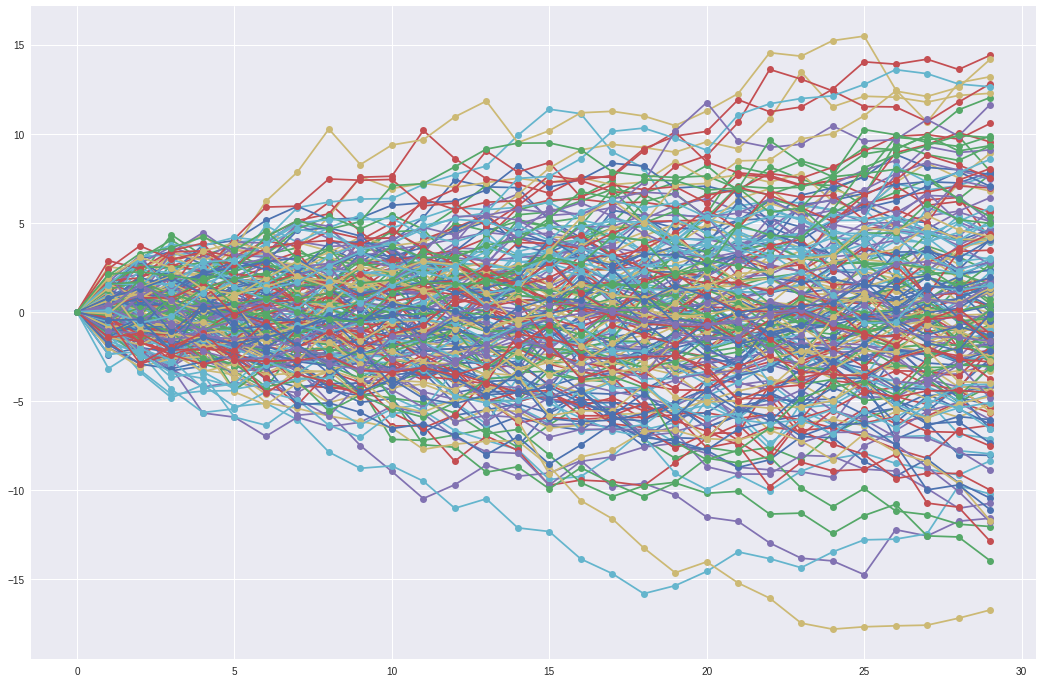

In [50]:
t = np.arange(30)
y = np.zeros((200,30))
for i in range(200):
    y[i] = np.insert(np.cumsum(sp.stats.norm.rvs(size=29)), 0, 0)

ax = plt.figure(figsize=(18,12))
for i in range(200):
    plt.plot(t,y[i], '-o')
    

시간이 지나면서 분산이 커지므로 이건 wide-sense stationary가 아니다.

Mean of y_1: 0.0368773364778
Mean of y_9: -0.078754292961


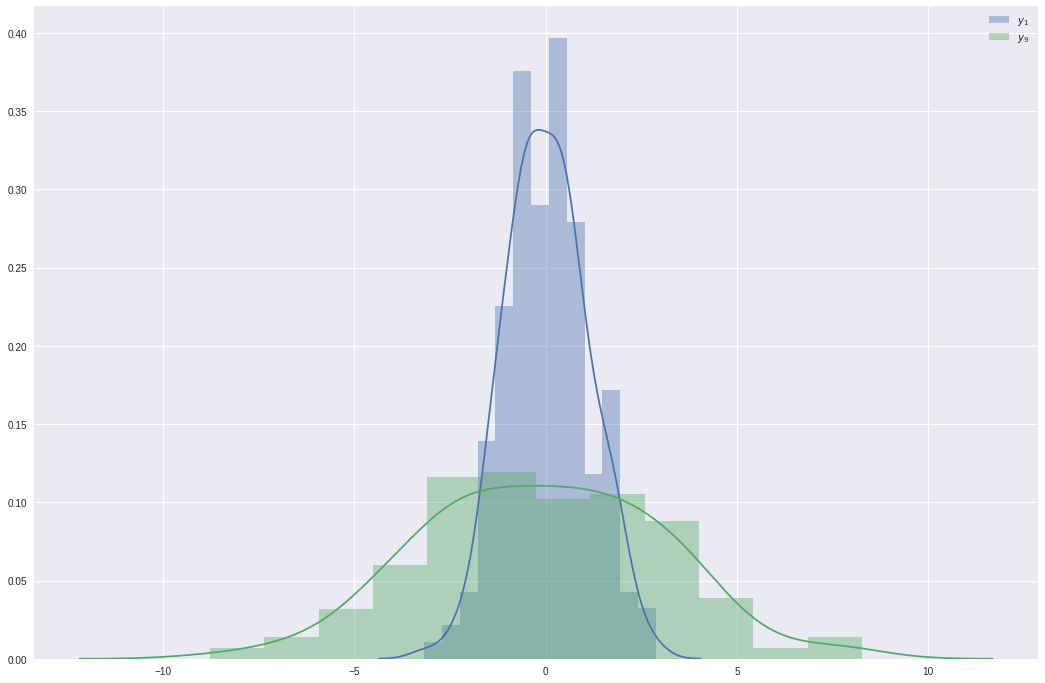

In [65]:
y_1 = y[:,1]
y_9 = y[:,9]

plt.figure(figsize=(18,12))
sns.distplot(y_1)
sns.distplot(y_9)
plt.legend(['$y_1$', '$y_9$'])

print('Mean of y_1:', np.mean(y_1))
print('Mean of y_9:', np.mean(y_9))

**구분하는게 중요하다. 앙상블 에버리지라 하면 특정 시간에서의 샘플간 평균을 말한다. 그냥 평균이라고 해버리면 가로로 (하나의 샘플에 대해 시간축을 따라) 구한 평균과 구분이 되지 않는다.** 즉, 같은 시간대에서 나온 애들끼리의 평균이 의미가 있지 다른 시간대의 평균은 애초에 다른 pdf를 가지므로 의미가 없다. 하지만 대부분의 경우 동일시간대에 얻어지는 데이터는 하나이다.

## 확률 과정의 기댓값, 자기공분산, 자기상관계수

확률 과정의 특성은 개별 시간 인덱스에 대한 확률 변수들의 결합 확률 밀도 함수를 사용하여 정의한다.

**확률 과정의 기대값**은 보통 $\mu_t$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$의 기댓값이다.

$$ \mu_t = \text{E}[Y_t] $$

**확률 과정의 자기공분산(auto-covariance)**은 보통 $\gamma_{t,s}$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$와 시간 인덱스 $s$에 대한 확률 변수 $Y_s$의 공분산이다. 

$$ \gamma_{t,s} = \text{Cov}[Y_t, Y_s]  = \text{E}\left[(Y_t-\text{E}[Y_t])(Y_s-\text{E}[Y_s])\right] $$


**확률 과정의 자기상관계수(auto-correlation)**은 보통 $\rho_{t,s}$로 표기하며 시간 인덱스 $t$에 대한 확률 변수 $Y_t$와 시간 인덱스 $s$에 대한 확률 변수 $Y_s$의 상관계수이다. 

$$ \rho_{t,s} = \text{Corr}[Y_t, Y_s] = \dfrac{ \text{Cov}[Y_t, Y_s] }{\sqrt{\text{Var}[Y_t]\text{Var}[Y_s]}} = \dfrac{\gamma_{t,s}}{\sqrt{\gamma_t\gamma_s}} $$


위의 정의에서 다음과 같은 성질을 만족함을 알 수 있다.

$$
\begin{eqnarray}
\gamma_{t,t} &=& \text{Var}[Y_t] \\
\gamma_{t,s} &=& \gamma_{s,t} \\
\left| \gamma_{t,s} \right| &\leq& \sqrt{\gamma_{t,t} \gamma_{s,s} } \\
\rho_{t,t} &=& 1 \\
\rho_{t,s} &=& \rho_{s,t} \\
\left| \rho_{t,s} \right| &\leq& 1 \\
\end{eqnarray}
$$

# 정상 확률 과정과 비정상 확률 과정

## 정상(정적상태, stationary state) 확률 과정

**협의의 정상 확률 과정(strictly stationary process, strong stationary process)**은 확률 과정의 모든 모멘트(moment)가 시간 차이(time lag)에만 의존하고 절대 시간에 의존하지 않는 것이다.

이를 수학적으로 표현하면 임의의 $t$, $s$, $k_i$에 대해 
$$ \text{E}[Y_{t} Y_{t+k_1} Y_{t+k_2} \cdots Y_{t+k_i} \cdots ] = \text{E}[Y_s Y_{s+k_1} Y_{s+k_2} \cdots Y_{s+k_i} \cdots] $$ 
가 성립한다.

즉. 기댓값의 경우
$$ \text{E}[Y_{t}] = \text{E}[Y_{s}] = \mu $$ 
가 성립하고 

자기공분산의 경우
$$ \text{E}[Y_{t}Y_{t+k}] = \text{E}[Y_{s}Y_{s+k}] = f(k) $$ 
가 성립한다.

**즉 k값에 의해서만 달라지므로 k값에 대한 함수로 볼 수 있다.**, 위에 그림을 봐라 $y_1$일 때와 $y_9$일 때의 분산은 명확하게 다르다.

위 두가지 조건만 성립하는 경우에는 **광의의 정상 확률 과정(wide-sense stationary process, weak stationary process)**라고 한다. 실제로 무한대의 모멘트까지 다 같다면 strictly stationary라하며 2차모멘트, 즉 분산까지의 모멘트가 같다면 wise-sense stationary라 한다.

**정상 확률과정에서는 자기공분산이 두 시간 인덱스의 차이 즉 시차(lag) $k$에만 의존하므로** 자기공분산을 다음과 같이 표기하며 시차에 대한 1차원 함수가 된다. 따라서 자기공분산함수(auto covariance function)라고도 한다.

$$ \gamma_{t,t+k} =  \gamma_{0,k} \triangleq  \gamma_k $$

정상 확률 과정의 자기상관계수도 마찬가지로 시차 $k$에만 의존한다. 이를 자기상관계수 함수(auto-correlation function) 줄여서 ACF라고 한다.

$$ \rho_{t,t+k} = \rho_{0,k} \triangleq \rho_k = \dfrac{\gamma_k}{\gamma_0} $$

정상 확률 과정은 다음과 같은 성질을 만족한다.

$$
\begin{eqnarray}
\gamma_0 &=& \text{Var}[Y_t] \\
\gamma_{k} &=& \gamma_{-k} \\
\left| \gamma_{k} \right| &\leq& \gamma_{0}  \\
\rho_{0} &=& 1 \\
\rho_{k} &=& \rho_{-k} \\
\left| \rho_{k} \right| &\leq& 1 \\
\end{eqnarray}
$$

memoryless와 static state는 완전히 다른거다.

|X|Y|
|---|---|
|2015|100|
|2016|101|
|2017|102|
|2018|103|

**2019년에 뭘 맞추려고 할 때 2015, 2016, 2017, 2018을 사용하지 않는다 이걸 쓰면 회귀분석이지 시계열 분석이 아니다. X를 쓰지 않고 Y값들만 가지고 correlation을 이용할 때 시계열분석이다.**

## 에르고딕 확률 과정

정상 확률 과정에 대해서는 다음과 같이 에르고딕 성질(ergodicity)을 가정할 수 있다.

에르고딕 확률 과정(ergodic process)은 모멘트에 대한 **시간 평균값이 앙상블 기댓값으로 수렴**하는 정상 확률 과정을 말한다.

기댓값의 경우,

$$ \text{E}[Y_t] = \lim_{T \rightarrow \infty} \dfrac{1}{T} \int_0^T Y_t dt $$

자기공분산의 경우

$$ \text{E}[Y_{t}Y_{t+k}] = \lim_{T \rightarrow \infty} \dfrac{1}{T} \int_0^T Y_t Y_{t+k} dt $$

가 성립한다.

에르고딕 확률 과정에 대해서는 하나의 샘플 즉 시계열 자료만 가지고도 기댓값과 자기공분산을 추정할 수 있기 때문에 대부분의 시계열 분석에서는 특별히 명시하지 않더라도 에르고딕 확률 과정을 가정하는 경우가 많다.

다음 파이썬 코드는 에르고딕 확률 과정의 샘플에서 기댓값과 lag 0의 자기공분산을 추정하는 예이다.

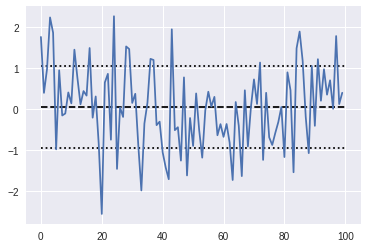

In [66]:
np.random.seed(0)
N = 100
t = np.arange(N)
y = sp.stats.norm.rvs(size=N)
mean = np.mean(y)
var = np.var(y)
plt.plot(t, y)
plt.hlines(mean, 0, N, linestyle='--')
plt.hlines(np.sqrt(var)+mean, 0, N, linestyle=':')
plt.hlines(-np.sqrt(var)+mean, 0, N, linestyle=':')

시간이 어찌되건 stationary할경우 ergodic한 특성도 보통 가정한다. 

## 비정상 확률 과정

정상 확률 과정이 아닌 확률 과정이 **비정상 확률 과정(non-stationary process)**이다. 

비정상 확률 과정이 되는 경우는 

* 추세를 가지는 경우. 일차 모멘트 즉, 기댓값 $\text{E}[y_t]$이 0이 아니며 시간에 따라 변화함
* 추세가 없지만 $\text{E}[y_t] = 0 $이지만 분산 $\text{Var}[y_t]$ 이 시간에 따라 변하는 경우

등이 있다. 

이 중 두번째 경우를 살펴보자. 

다음 시계열 자료들은 동일한 확률 과정의 샘플들이다. 하나 하나의 샘플(시계열 자료)만 보면 마치 추세가 있는 것처럼 보인다. 그러나 이는 확률 과정의 분산 $\text{Var}[y_t]$이 시간 $t$에 따라 커지기 때문이다. 그래프에 표시하였듯이 $t=400$에서의 분산 $\text{Var}[y_{400}]$은 $t=100$에서의 분산 $\text{Var}[y_{100}]$보다 크다.


이런 경우 보통 **확률적 추세(stochastic trend)**를 가진다고 말하기도 한다. 그러나 이 용어는 명확한 학술적인 정의는 아니다.

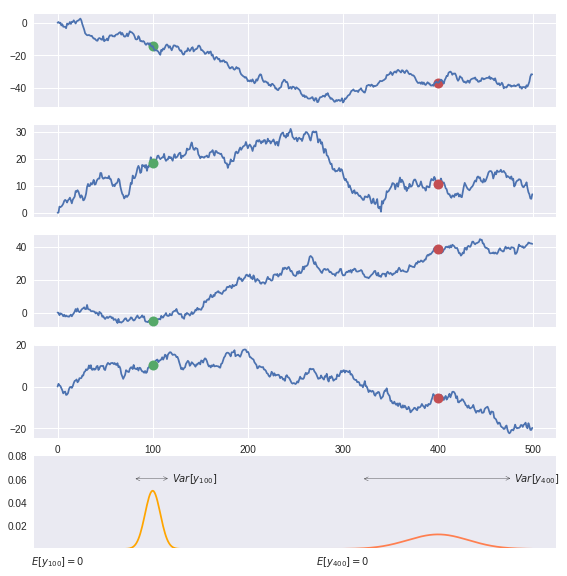

In [67]:
N = 500; t1 = 100; t2 = 400
t = np.arange(N)

np.random.seed(12); y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(18); y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(22); y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)
np.random.seed(24); y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)), 0, 0)

plt.figure(figsize=(8,8))

ax1 = plt.subplot(5, 1, 1); plt.plot(t, y1); ax1.set_zorder(2); ax1.set_xticklabels([]); 
ax2 = plt.subplot(5, 1, 2); plt.plot(t, y2); ax2.set_zorder(1); ax2.set_xticklabels([]); 
ax3 = plt.subplot(5, 1, 3); plt.plot(t, y3); ax3.set_zorder(1); ax3.set_xticklabels([]); 
ax4 = plt.subplot(5, 1, 4); plt.plot(t, y4); ax4.set_zorder(1); 

ax5 = plt.subplot(5, 1, 5); ax5.set_zorder(1); ax5.set_xticklabels([]); ax5.grid(False)
ax5.plot(t, sp.stats.norm(t1, 0.08*t1).pdf(t), 'orange')
ax5.plot(t, sp.stats.norm(t2, 0.08*t2).pdf(t), 'coral')
ax5.set_ylim(0.001, 0.08);
ax5.set_xticklabels(["", "$E[y_{100}] = 0$", "", "", "$E[y_{400}] = 0$"])

ax5.annotate("$Var[y_{100}]$", xy=(t1-20, 0.06), xytext=(t1+20, 0.058), arrowprops=dict(arrowstyle="<->"))
ax5.annotate("$Var[y_{400}]$", xy=(t2-80, 0.06), xytext=(t2+80, 0.058), arrowprops=dict(arrowstyle="<->"))


from matplotlib.patches import ConnectionPatch
con1 = ConnectionPatch(xyA=(t1, 10), xyB=(t1,0.001), ls="--", lw=2, color="darkgray", 
                       coordsA="data", coordsB="data", axesA=ax1, axesB=ax5, zorder=2)
ax1.add_artist(con1);
con2 = ConnectionPatch(xyA=(t2, 10), xyB=(t2,0.001), ls="--", lw=2, color="darkgray", 
                       coordsA="data", coordsB="data", axesA=ax1, axesB=ax5)
ax1.add_artist(con2);

ax1.plot(t1, y1[t1], 'o', markersize=10, zorder=1); ax1.plot(t2, y1[t2], 'o', markersize=10, zorder=1);
ax2.plot(t1, y2[t1], 'o', markersize=10); ax2.plot(t2, y2[t2], 'o', markersize=10); 
ax3.plot(t1, y3[t1], 'o', markersize=10); ax3.plot(t2, y3[t2], 'o', markersize=10); 
ax4.plot(t1, y4[t1], 'o', markersize=10); ax4.plot(t2, y4[t2], 'o', markersize=10); 

plt.tight_layout(h_pad=0.1)

# 백색 잡음

시계열 분석을 구성하는 여러가지 기본 모형 중 가장 중요한 것이 바로 **백색 잡음(white noise)**이다. 

백색 잡음 $e$은 확률 과정을 구성하는 모든 개별 확률 변수 $e_t$들이 서로 독립이고(independent) 동일한 확률 분포를 따르는(identically distributed) 확률 과정을 말한다. 이러한 가정을 약자로 $i.i.d$ 가정이라고 한다. 백색 잡음의 기반이 되는 확률 변수의 분포가 반드시 정규 분포일 필요는 없다.

$$ e_t \sim i.i.d \;\; \text{ for all } t$$

백색 잡음은 다음과 같은 특성을 만족한다.

* 정상 과정(stictly stationary process)이다.

* 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0이다.
$$ \gamma_l = \begin{cases} \text{Var}[e_t] & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases} $$

* 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0이다.
$$ \rho_l = \begin{cases} 1 & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases} $$


## 가우시안 백색 잡음

확률 분포가 표준 가우시안 정규 분포인 백색 잡음을 가우시안 백색 잡음(Gaussina white noise)라고 한다. 

$$ e_t \sim i.i.d \; N(\mu, \sigma^2) \;\; \text{ for all } t$$


가우시안 백색 잡음은 다음과 같이 시뮬레이션 할 수 있다.

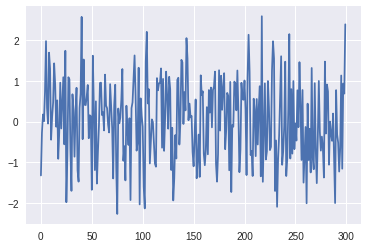

In [68]:
e = sp.stats.norm.rvs(size=300)
plt.plot(e);

## 비-가우시안 백색 잡음

앞서 밝혔지만 백색 잡음을 이루는 기반 확률 분포가 반드시 정규 분포일 필요는 없다. 예를 들어 가장 단순한 경우로서 $\{1, -1\}$로 구성되고 1이 나올 확률 $p=0.5$인  베르누이 확률 과정도 백색 잡음이 된다.

(-1.1, 1.1)

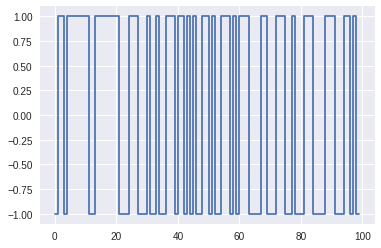

In [69]:
e = sp.stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(e)), e)
plt.ylim(-1.1, 1.1)

## 백색 잡음의 스펙트럼

백색 잡음에 대한 파워 스펙트럼을 구하면 이론적으로는 평평한(flat) 형태가 된다. 시계열의 파워 스펙트럼을 평평하게 만드는 필터를 적용하는 것을 **백색화(whitening)**라고도 한다.

(0.05, 1000.0)

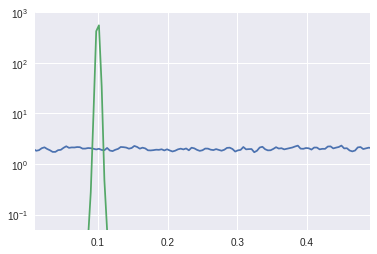

In [70]:
import scipy.signal
sp.random.seed(0)
N = 2**15
e = sp.stats.bernoulli.rvs(0.5, size=N) * 2 - 1

f1, P1 = sp.signal.welch(e)
plt.semilogy(f1, P1);

# 비교를 위한 단일 주파수 신호 (mono tone)
fs = 10e3; N = 1e5; amp = 2*np.sqrt(2); freq = 1000; noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
s = amp*np.sin(2*np.pi*freq*time)

f2, P2 = sp.signal.welch(s)
plt.semilogy(f2, P2);
plt.xlim([0.01, 0.49])
plt.ylim([0.5e-1, 1e3])

# 이산 시간 랜덤 워크

비정상 확률 과정의 대표적인 예가 랜덤 워크(random walk)이다. 여기에서는 시간 인덱스가 연속적이지 않은 이산 시간(discrete-time) 랜덤 워크를 소개한다.

이산 시간 랜덤 워크는 백색 잡음(white noise)을 누적한 값으로 이루어진 확률 과정을 말한다.

수식으로 정의하면 다음과 같다.

$$ 
\begin{eqnarray}
W_1 &=& e_1 \\
W_2 &=& e_1 + e_2 \\
\vdots &=& \vdots \\
W_t &=& e_1 + e_2 + \cdots + e_t \\
\end{eqnarray}
$$

또는

$$ W_t = W_{t-1} + e_t $$


이산 시간 랜덤 워크는 다음과 같은 특성을 가진다.

* 기댓값은 0

$$ \text{E}[W_t] = 0 $$

$$ \text{E}[W_t] = \text{E} \left[ \sum_{i=1}^t e_t \right] = \sum_{i=1}^t \text{E} \left[ e_t \right] = 0 $$
* 분산은 시간에 비례

$$ \text{Var}[W_t] = t\sigma_e^2 $$

$$ \text{Var}[W_t] = \text{E} \left[ \sum_{i=1}^t e_t^2 \right]  =  t\sigma_e^2 $$ 

* 자기공분산은 두 시간 중 빠른 시간에 비례

$$ \gamma_{t,s} =  \gamma_{s, t} = t\sigma_e^2  \; \text{ if } t < s $$

$$ \gamma_{t,s} = \text{Cov}[W_t, W_s] = \text{E} \left[ \sum_{i=1}^t e_t \sum_{i=1}^s e_s \right]  = \text{E} \left[ \sum_{i=1}^t e_t^2 \right]  =  t\sigma_e^2 $$ 


* 자기상관계수는 두 시간의 비율의 제곱근에 비례

$$ \rho_{t,s} = \rho_{s,t} = \sqrt{\dfrac{t}{s}}  \; \text{ if } t < s $$

$$ \rho_{t,s} = \dfrac{\text{Cov}[W_t, W_s]}{\sqrt{\text{Var}[W_t]\text{Var}[W_s]}} 
= \dfrac{t\sigma_e^2}{\sqrt{t\sigma_e^2 s\sigma_e^2}} = \sqrt{\dfrac{t}{s}}  $$ 


이산 시간 랜덤 워크는 백색 잡음에 대한 누적합(cumsum)으로 구현할 수 있다.

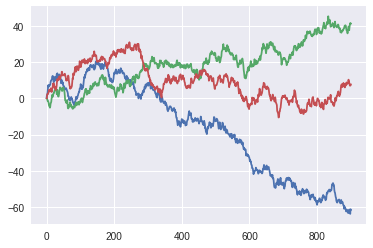

In [71]:
for i in range(3):
    np.random.seed(9*i)
    e = sp.stats.norm.rvs(size=900)
    W = np.insert(np.cumsum(e), 0, 0)
    plt.plot(W);

# 일반 선형 확률 과정 모형

정상 확률 과정(stationary process)에서 가장 일반적으로 사용되는 모형은 **일반 선형 확률 과정 모형(general linear process model)**이다. 일반 선형 확률 과정 모형은 시계열이 **가우시안 백색 잡음의 현재 값과 과거 값들의 선형 조합으로 이루어져 있다**고 가정한다. 이 수식에서 $e_t$는 가우시안 백색 잡음이고 $\psi$는 백색 잡음에 곱해지는 가중 계수(weight coefficient)이다.


$$ Y_t = e_t + \psi_1 e_{t-1}  + \psi_2 e_{t-2}  + \psi_1 e_{t-3}  + \cdots $$

이 모형을 블럭 다이어그램으로 나타내면 다음과 같다. 이 다이어그램에서 $D$는 신호가 저장되었다가 다음 시간에 나오는 일종의 저장 장치이다. 지연(delay, lag) 요소라고 불린다.

다만 선형 확률 과정 모형이 성립하려면 계수들이 다음 조건을 만족해야 한다. 이 조건은 전체 항들의 합이 수렴하도록 즉, 전체 값의 크기가 과도하게 커지지 않도록 하는 역할을 한다.

$$ \sum_{i=1}^{\infty} \psi_i^2 < \infty $$

일반 선형 확률 과정 모형은 계수의 특성에 따라 다음과 같은 하위 모형으로 분류할 수 있다


* MA (Moving Average) 모형
* AR (Auto-Regressive) 모형
* ARMA (Auto-Regressive Moving Average) 모형

MA 모형은 일반 선형 확률 모형의 차수가 유한(finite)한 경우를 말한다. $q$차수의 MA 모형은 MA(q)로 표기하며 다음 수식을 만족한다.

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots - \theta_q e_{t-q} $$

부호는 마음대로이나 -로 설정된 이유는 이항시켰을 때 +가 되도록 설정했기 떄문이다.

AR 모형은 자기 자신의 과거값에 의존적인 모형을 말한다.  $p$차수의 AR 모형은 AR(p)로 표기하며 다음 수식을 만족한다.

$$ Y_t = \phi_1 Y_{t-1}  + \phi_2 Y_{t-2}  + \cdots + \phi_p Y_{t-p}  + e_t $$

**$e_t$의 해석은 매우 중요하다 위의 식에서 $e_t$가 없다면 과거값을 통한 완벽한 예측이 가능하다는 이야기가 된다. $e_t$가 가지는 불확실성으로 인해 과거값을 통해 미래값을 정확하게 예측할 수 없게 된다.**

**그림 중요하다 그림봐라 그림(diagram)**

In [215]:
print("Test value condition: seed=0, length = 5 (for 1, 2), n_samples = 100")

def random_process_1(n_length, n_sample, seed=0):
    """Returns Moving Average of y_t = e_t + e_{t-1}, 
    support multi-length"""
    np.random.seed(seed)
    error = np.random.normal(size=(n_length, n_sample))
    y = np.zeros((n_length, n_sample-1))
    
    for i in range(1, n_sample):
        y[:,i-1] = error[:,i] + error[:,i-1]
        
    return y

x_range1 = np.arange(99)
result_1 = random_process_1(5,100)
print("Result 1: ", result_1)

def random_process_2(n_length, n_sample, seed=0):
    """Returns Moving Average of y_t = e_t - e_{t-1} + 0.6*e_{t-2}, 
    support multi-length"""
    np.random.seed(seed)
    error = np.random.normal(size=(n_length, n_sample))
    y = np.zeros((n_length, n_sample-2))
    
    for i in range(2, n_sample):
        y[:,i-2] = error[:,i] - error[:,i-1] + 0.6*error[:,i-2]
        
    return y

x_range2 = np.arange(98)
result_2 = random_process_2(5,100)
print("Result 2: ", result_2)

def random_process_3(n_sample, seed=0):
    """Returns Auto-Regressive value of y_t = 0.9*y_{t-1} + e_t,
    Assumption: Initial values of y is 0"""
    np.random.seed(seed)
    y = np.zeros(n_sample)
    for i in range(1, n_sample):
        error = np.random.normal(1)
        y[i] = 0.9*y[i-1] + error
        
    return y

x_range3 = np.arange(100)
result_3 = random_process_3(100)
print("Result 3: ", result_3)

def random_process_4(n_sample, seed=0):
    """Returns Auto-Regressive value of y_t = y_{t-1} - 0.6*y_{t-2} + e_t,
    Assumption: Initial values of y is 0"""
    np.random.seed(seed)
    y = np.zeros(n_sample)
    for i in range(2, n_sample):
        error = np.random.normal(1)
        y[i] = y[i-1] - 0.6*y[i-2] + error
        
    return y

x_range4 = np.arange(100)
result_4 = random_process_4(100)
print("Result 4: ", result_4)

Test value condition: seed=0, length = 5 (for 1, 2), n_samples = 100
Result 1:  [[ 2.16420955  1.37889519  3.21963118  4.10845119  0.89028011 -0.02718946
   0.79873121 -0.25457606  0.30737965  0.55464207  1.59831708  2.21531123
   0.88271274  0.56553825  0.77753756  1.8277534   1.28892081  0.10790944
  -0.54102804 -3.40708556 -1.89937122  1.51805479  0.12227118  1.5275896
   0.81538895 -1.40860716 -0.14142533  1.34559536  3.00213798  1.6243062
   0.53310995 -0.50962323 -2.86858222 -2.32870862 -0.19156318  1.38663965
   2.43267053  0.81505303 -0.68962957 -1.35085572 -2.4685709  -3.12628813
   0.2445052   1.44112321 -0.94772648 -1.69086966 -0.475305   -0.83640749
  -1.82663813 -1.10820684 -0.50856406 -0.12390264 -1.69143732 -1.20881441
   0.40014964  0.49484909  0.36898912 -0.3318502  -0.99706326 -1.03520161
  -1.03201361 -1.17269944 -2.53942888 -1.54885646 -0.22435479 -2.03197928
  -1.16741609 -0.44451611 -0.85535297  0.78103596  0.85807347  1.2683836
  -0.09542514 -0.83248418 -0.282468

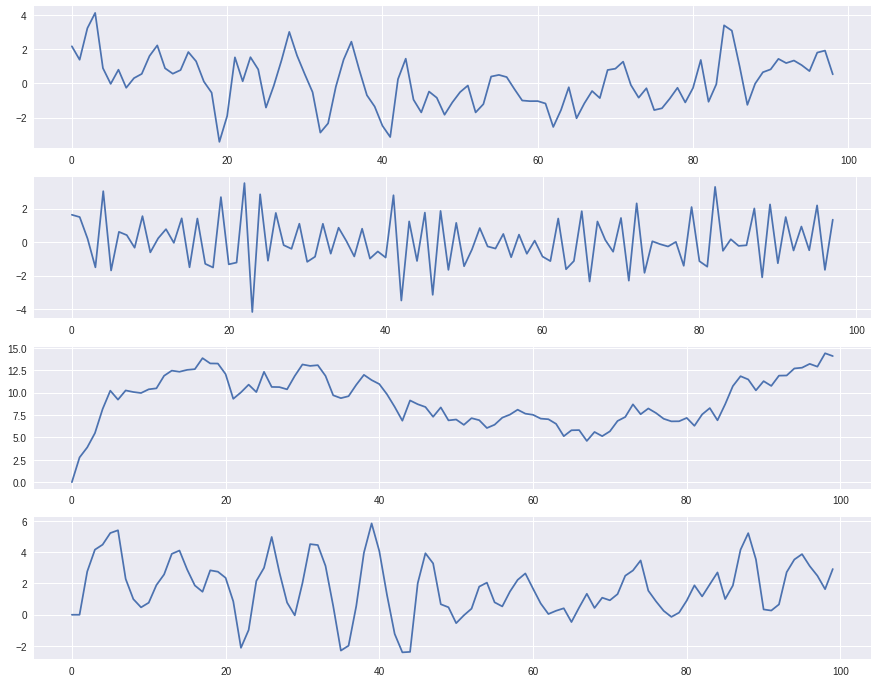

In [216]:
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
plt.plot(x_range1, result_1[0])
plt.subplot(4,1,2)
plt.plot(x_range2, result_2[0])
plt.subplot(4,1,3)
plt.plot(x_range3, result_3)
plt.subplot(4,1,4)
plt.plot(x_range4, result_4)

# StatsModels 패키지의 ARMA 모형 클래스

StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

| 클래스 이름   | 용도        |
| ------------- |-------------|
| `ArmaProcess` | 미리 정해진 계수를 가진 ARMA 모형 |
| `ARMA`        | 주어진 자료에서 계수를 추정하기 위한 ARMA 모형 |
| `ARMAResults` | 주어진 자료에서 추정된 ARMA 모형  |

## `ArmaProcess` 클래스 사용법

`ArmaProcess` 클래스는 정해진 모형 계수를 가진 ARMA 모형을 특성을 분석하기 위한 클래스이다.

### 모형 생성

| 클래스 이름   | 용도 |
| ------------- |------|
| `ArmaProcess` | AR, MA 계수 행렬에서 ARMA 모형 생성 |
| `ArmaProcess.from_estimation()` | 추정된 ARMAResults 에서 ARMA 모형 생성 |

계수로부터 ARMA 모형을 만드는 경우에는 `ArmaProcess`를 직접 사용한다. 단, 계수의 부호는 다음 수식을 기준으로 한다. AR 계수의 부호가 일반적인 ARMA 모형과 다를 수 있다.


$$  \phi(L) Y_t = \mu + \psi(L) \varepsilon_t  $$
  

$$
\begin{eqnarray}
  \phi(L) &= 1 + a_1 L + a_2 L^2 + \cdots a_p L^p \\
  \psi(L) &= 1 + b_1 L + b_2 L^2 + \cdots b_q L^q
\end{eqnarray}
$$


$$  Y_t = -a_1 Y_{t-1} - a_2 Y_{t-2} \cdots - a_p Y_{t-p} + \mu + \varepsilon_t + b_1 \varepsilon_{t-1} + b_2 \varepsilon_{t-2} + \cdots b_q \varepsilon_{t-q} $$


다음은 `ArmaProcess` 를 사용하는 예제이다. 여기에서는 다음과 같은 ARMA(2,2) 모형을 생성한다.

$$   Y_t = 0.75 Y_{t-1} - 0.25 Y_{t-2} + \varepsilon_t + 0.65 \varepsilon_{t-1} + 0.35 \varepsilon_{t-2}  $$


In [221]:
from statsmodels.tsa.arima_process import ArmaProcess

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = ArmaProcess(ar, ma)
print(type(m))

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


### 샘플 시계열 생성

| 메서드, 속성 이름 | 용도 |
|--|--|
| `generate_sample()` | 주어진 ARMA 모형에서 나올 수 있는 시계열을 무작위로 생성 |

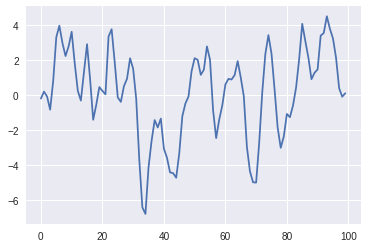

In [222]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

### 특성 분석

| 메서드, 속성 이름 | 	용도 |
|--|--|
| `isstationary` |  	모형 안정성(stability) |
| `isinvertible` | 	모형 가역성(invertibility) |
| `acovf()` | 	이론적인 자기 공분산(autocovariance) 값 |
| `acf()` | 	이론적인 자기 상관계수(autocorrelation) 값 |
| `pacf()` | 	이론적인 자기 편상관계수(partial autocorrelation) 값 |

True
True


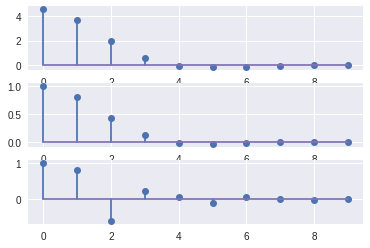

In [226]:
print(m.isstationary)
print(m.isinvertible)
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

# StatsModels 패키지의 ARMA 모형 클래스

StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

| 클래스 이름   | 용도        |
| ------------- |-------------|
| `ArmaProcess` | 미리 정해진 계수를 가진 ARMA 모형 |
| `ARMA`        | 주어진 자료에서 계수를 추정하기 위한 ARMA 모형 |
| `ARMAResults` | 주어진 자료에서 추정된 ARMA 모형  |

## `ArmaProcess` 클래스 사용법

`ArmaProcess` 클래스는 정해진 모형 계수를 가진 ARMA 모형을 특성을 분석하기 위한 클래스이다.

### 모형 생성

| 클래스 이름   | 용도 |
| ------------- |------|
| `ArmaProcess` | AR, MA 계수 행렬에서 ARMA 모형 생성 |
| `ArmaProcess.from_estimation()` | 추정된 ARMAResults 에서 ARMA 모형 생성 |

계수로부터 ARMA 모형을 만드는 경우에는 `ArmaProcess`를 직접 사용한다. 단, 계수의 부호는 다음 수식을 기준으로 한다. AR 계수의 부호가 일반적인 ARMA 모형과 다를 수 있다.


$$  \phi(L) Y_t = \mu + \psi(L) \varepsilon_t  $$
  

$$
\begin{eqnarray}
  \phi(L) &= 1 + a_1 L + a_2 L^2 + \cdots a_p L^p \\
  \psi(L) &= 1 + b_1 L + b_2 L^2 + \cdots b_q L^q
\end{eqnarray}
$$


$$  Y_t = -a_1 Y_{t-1} - a_2 Y_{t-2} \cdots - a_p Y_{t-p} + \mu + \varepsilon_t + b_1 \varepsilon_{t-1} + b_2 \varepsilon_{t-2} + \cdots b_q \varepsilon_{t-q} $$


다음은 `ArmaProcess` 를 사용하는 예제이다. 여기에서는 다음과 같은 ARMA(2,2) 모형을 생성한다.

$$   Y_t = 0.75 Y_{t-1} - 0.25 Y_{t-2} + \varepsilon_t + 0.65 \varepsilon_{t-1} + 0.35 \varepsilon_{t-2}  $$


<class 'statsmodels.tsa.arima_process.ArmaProcess'>


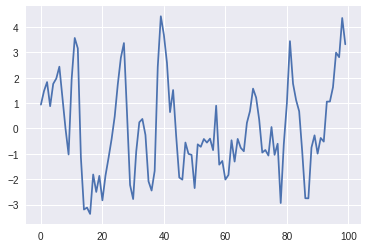

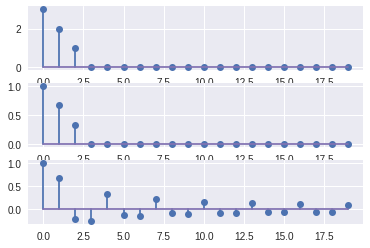

In [235]:
arparams = np.array([0])
maparams = np.array([1, 1])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = ArmaProcess(ar, ma)
print(type(m))

x = m.generate_sample(100)
plt.plot(x)
plt.show()
plt.subplot(311)
plt.stem(m.acovf(20))
plt.subplot(312)
plt.stem(m.acf(20))
plt.subplot(313)
plt.stem(m.pacf(20))
plt.show()

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


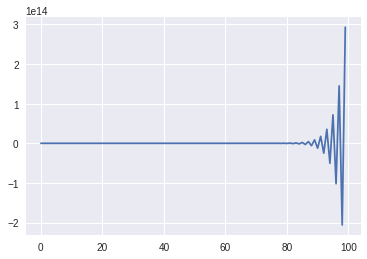

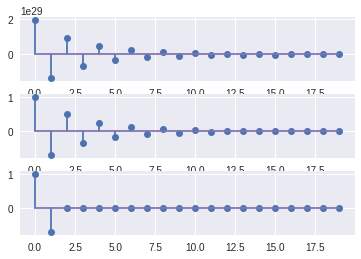

In [238]:
arparams = np.array([-1, 0.6])
maparams = np.array([1])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = ArmaProcess(ar, ma)
print(type(m))

x = m.generate_sample(100)
plt.plot(x)
plt.show()
plt.subplot(311)
plt.stem(m.acovf(20))
plt.subplot(312)
plt.stem(m.acf(20))
plt.subplot(313)
plt.stem(m.pacf(20))
plt.show()